# **Intro to Python for Data Analysis**
## Chapter 5: Exploratory Data Analysis (EDA)
---
**Author:** Juan Martin Bellido  

**About**  
On this chapter we explore how to apply descriptive Statistics to explore data we work with.

**Feedback?** Please share on [LinkedIn](https://www.linkedin.com/in/jmartinbellido/)  

# Chapter 5: Exercises
---

### Exercise #1

How did evolve "high" opening rates on Amazon stocks since 2017?

> Dataset https://data-wizards.s3.amazonaws.com/datasets/amzn_stocks.csv





In [ ]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
from matplotlib.pyplot import figure
from scipy import stats
from pandas.plotting import scatter_matrix

In [ ]:
%matplotlib inline

In [ ]:
# importing df
df_amzn = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/amzn_stocks.csv")
df_amzn.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

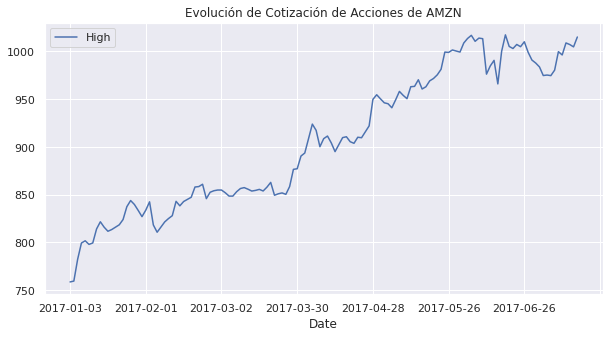

In [ ]:
df_amzn[df_amzn["Date"]>'2017-01-01'].plot(
    kind='line'
    ,x='Date' 
    ,y='High'
    ,figsize=(10,5)
    ,title='Evolución de Cotización de Acciones de AMZN'
)

### Exercise #2

A. How many directors are inclured in the dataset?  

B. Pull top 10 variables with highest correlation with variable "IMDB score"

> Dataset https://data-wizards.s3.amazonaws.com/datasets/movies.csv


In [ ]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
from matplotlib.pyplot import figure
from scipy import stats
from pandas.plotting import scatter_matrix

In [ ]:
%matplotlib inline

In [ ]:
# importing df
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [ ]:
df_movies["director_name"].describe()

count                 4814
unique                2397
top       Steven Spielberg
freq                    26
Name: director_name, dtype: object

In [ ]:
df_movies.corr().sort_values("imdb_score",ascending=False).iloc[1:11,]["imdb_score"]

num_voted_users              0.412427
num_critic_for_reviews       0.309733
num_user_for_reviews         0.295779
duration                     0.264440
movie_facebook_likes         0.252496
gross                        0.199914
director_facebook_likes      0.173969
cast_total_facebook_likes    0.086830
actor_2_facebook_likes       0.083761
actor_1_facebook_likes       0.077070
Name: imdb_score, dtype: float64

### Exercise #3

Select top 5% action movies with highest IMDB score.

> Dataset https://data-wizards.s3.amazonaws.com/datasets/movies.csv

In [ ]:
# importing packages
import pandas as pd

In [ ]:
%matplotlib inline

In [ ]:
df_movies = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/movies.csv")
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [ ]:
cond = df_movies.genres.str.contains('Action',case=False)
dist_95 = df_movies[cond].imdb_score.quantile(0.95)

In [ ]:
cond = df_movies.genres.str.contains('Action',case=False)
cond_2 = df_movies.imdb_score >= dist_95

df_movies[cond & cond_2]\
  .loc[:,['movie_title','genres','imdb_score']]\
  .sort_values('imdb_score',ascending=False)

,movie_title,genres,imdb_score
4312,Kickboxer: Vengeance,Action,9.1
66,The Dark Knight,Action|Crime|Drama|Thriller,9.0
335,The Lord of the Rings: The Return of the King,Action|Adventure|Drama|Fantasy,8.9
2031,Star Wars: Episode V - The Empire Strikes Back,Action|Adventure|Fantasy|Sci-Fi,8.8
97,Inception,Action|Adventure|Sci-Fi|Thriller,8.8
453,Daredevil,Action|Adventure|Crime|Drama|Sci-Fi|Thriller,8.8
267,The Lord of the Rings: The Fellowship of the Ring,Action|Adventure|Drama|Fantasy,8.8
4635,Seven Samurai,Action|Adventure|Drama,8.7
647,The Matrix,Action|Sci-Fi,8.7
2973,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,8.7


### Exercise #4

What can we infer about the distribution of the GDP per capita by continent? Build a boxplot

> Dataset https://data-wizards.s3.amazonaws.com/datasets/dataset_na_who.csv



In [ ]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
from matplotlib.pyplot import figure
from scipy import stats
from pandas.plotting import scatter_matrix

In [ ]:
%matplotlib inline

In [ ]:
# importing df
df_who = pd.read_csv('https://data-wizards.s3.amazonaws.com/datasets/dataset_na_who.csv')
df_who.dtypes

Country                                                    object
CountryID                                                   int64
ContinentID                                                 int64
Adolescent fertility rate (%)                             float64
Adult literacy rate (%)                                   float64
Gross national income per capita (PPP international $)    float64
Net primary school enrolment ratio female (%)             float64
Net primary school enrolment ratio male (%)               float64
Population (in thousands) total                           float64
Population annual growth rate (%)                         float64
Population in urban areas (%)                             float64
Population living below the poverty line                  float64
Continent                                                  object
dtype: object

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


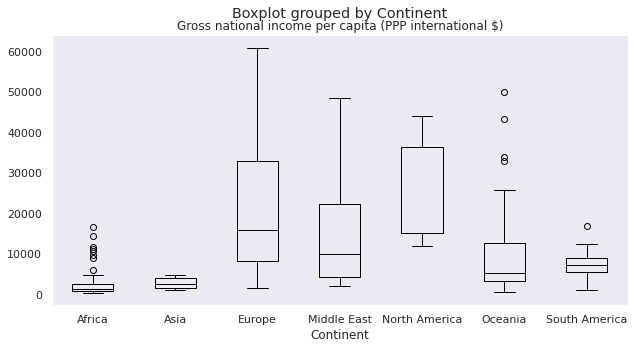

In [ ]:
df_who.boxplot(
    by ='Continent'
    ,column ='Gross national income per capita (PPP international $)'
    ,grid = False
    ,color = 'black'
    ,figsize=(10,5)
)

### Exercise #5

What parcentage of total reviews are on (brand) Microsoft?
> Dataset https://data-wizards.s3.amazonaws.com/datasets/amzn_reviews.txt

In [ ]:
import pandas as pd

In [ ]:
%matplotlib inline

In [ ]:
df_amzn = pd.read_csv("https://data-wizards.s3.amazonaws.com/datasets/amzn_reviews.txt",sep='\t')
df_amzn.dtypes

asin                    object
brand                   object
categories              object
colors                  object
dateAdded               object
ean                    float64
manufacturer            object
manufacturerNumber      object
name                    object
primaryCategories       object
reviews_date            object
reviews_doRecommend     object
reviews_numHelpful     float64
reviews_rating         float64
reviews_text            object
reviews_title           object
reviews_username        object
dtype: object

In [ ]:
df_amzn.brand.value_counts(normalize=True)['Microsoft']

0.0694615700780929